### Thera Bank Personal Loan Campaign
<b>Data Description:</b>
The dataset contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customer's relationship with the bank (mortgage, securities
account, etc.), and the customer response to the last personal loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to
them in the earlier campaign.<br>

<b>Domain:</b>
Banking<br>

<b>Context:</b>
This case is about a bank (Thera Bank) whose management wants to explore ways of converting
its liability customers to personal loan customers (while retaining them as depositors). A
campaign that the bank ran last year for liability customers showed a healthy conversion rate of
over 9% success. This has encouraged the retail marketing department to devise campaigns
with better target marketing to increase the success ratio with a minimal budget.<br>

<b>Attribute Information:</b>
    - ID: Customer ID
    - Age: Customer's age in completed years
    - Experience: #years of professional experience
    - Income: Annual income of the customer ($000)
- ZIP Code: Home Address ZIP code.
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month ($000) 
    - Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
    - Mortgage: Value of house mortgage if any. (000)
    - Personal Loan: Did this customer accept the personal loan offered in the last campaign?
    - Securities Account: Doesthe customer have a securities account with the bank?
    - CD Account: Doesthe customer have a certificate of deposit (CD) account with the bank?
    - Online: Does the customer use internet banking facilities?
    - Credit card: Doesthe customer use a credit card issued by the bank?
    
<b>Learning Outcomes:</b>
    - Exploratory Data Analysis
    - Preparing the data to train a model
    - Training and making predictions using a classificationmodel
    - Model evaluation
    
**Objective:**
     The classification goal is to predict the likelihood of a liability customer buying personal loans.<br>

1) Import the datasets and libraries, check datatype, statistical summary, shape, null values or
incorrect imputation. (5 marks)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

# Load the data into pandas dataframe
bData = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

#Print Data type
print(bData.dtypes)

#Print Shape
print('\n\n***Shape of dataset ')
print(bData.shape)

#Are there any nulls
print('\n\n***Check for null values in given dataset is : '+str(bData.isnull().values.any()))


#Print Statistical Summary
print('\n\n***Statistical Summary \n ')
bData.describe().T

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


***Shape of dataset 
(5000, 14)


***Check for null values in given dataset is : False


***Statistical Summary 
 


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [2]:
#Validate imputation 
# 1) Check for Experience 
# from above there is incorrect value for years of experience "-3" . This seems to be incorrect 
print(bData[bData['Experience'] <0]['Experience'].any())

bData.info()

True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


`**Observation**
Above results show Experince has some imputaton, 52 data set rows has negative years of experience`

In [3]:
# 2) Check for Age 
print('AGE Validation : ' + str(bData[bData['Age'] <0]['Age'].any()));

# 3) Credit Card Check: Validation weather customer has no CC and still has CCAvg spending >0 
noCCdf = bData[(bData['CreditCard'] == 0)]
print('#num of Customer having CCAvg > 0 even if CC not issued : ' + str(noCCdf[noCCdf['CCAvg']>0]["CCAvg"].count()));
#As per attribute details :Credit card: Does the customer use a credit card issued by the bank? 
#*****Assumption made there is no data issue , here CC could be issued from different financial institution.


AGE Validation : False
#num of Customer having CCAvg > 0 even if CC not issued : 3452


<b>2. EDA: Study the data distribution in each attribute and target variable, share your findings</b>
(20 marks)
- Number of unique in each column?
- Number of people with zero mortgage?
- Number of people with zero credit card spending per month?
- Value counts of all categorical columns.
- Univariate and Bivariate
- Get data model ready

## <a id = "link2"></a> Number of unique in each column

In [4]:
#Number of unique in each column
bData.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

## <a id = "link2"></a> Number of people with zero mortgage?

In [5]:
#Number of people with zero mortgage?
print('Number of people without mortgage : ' + str(bData[bData['Mortgage'] <=0]['Mortgage'].count()));

Number of people without mortgage : 3462


## <a id = "link2"></a> Number of people with zero credit card spending per month?

In [6]:
#Number of people with zero credit card spending per month?

print('Number of people without CC spending per month : ' + str(bData[bData['CCAvg'] <=0]['CCAvg'].count()));

Number of people without CC spending per month : 106


## <a id = "link2"></a> Value counts of all categorical columns.

In [7]:
#Value counts of all categorical columns.
# print(bData.columns)
catCols = {'Experience','ZIP Code','Education','Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard'} 

for i in list(catCols):
    print(bData[i].value_counts())
    print()

0    4478
1     522
Name: Securities Account, dtype: int64

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64

0    4520
1     480
Name: Personal Loan, dtype: int64

0    4698
1     302
Name: CD Account, dtype: int64

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

1    2984
0    2016
Name: Online, dtype: int64

1    2096
3    1501
2    1403
Name: Education, dty

## <a id = "link2"></a> Univariate Analysis

In [8]:
bData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
#Lets analysze the distribution of the various attribute
bData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [10]:
# Following to determine what need to be done with negative values of experience 
print('Income for all -ve value of Experience')
print(bData[bData['Experience'] <0][['Experience','Income']])
print('\n\n Total rows with -ve experience :' + str(bData[bData['Experience'] <0]['Experience'].count()))
print('\n\n Mean income for given dataset : '+ str(bData['Income'].mean()))
print('\n\n mean on income for -ve experience :' + str(bData[bData['Experience'] <0]['Income'].mean()))

Income for all -ve value of Experience
      Experience  Income
89            -1     113
226           -1      39
315           -2      51
451           -2      48
524           -1      75
536           -1      43
540           -1     109
576           -1      48
583           -1      38
597           -2     125
649           -1      82
670           -1      61
686           -1      38
793           -2     150
889           -2      82
909           -1     149
1173          -1      35
1428          -1      21
1522          -1     101
1905          -1     112
2102          -1      81
2430          -1      73
2466          -2      80
2545          -1      39
2618          -3      55
2717          -2      45
2848          -1      78
2876          -2      80
2962          -2      81
2980          -1      53
3076          -1      62
3130          -2      82
3157          -1      13
3279          -1      44
3284          -1     101
3292          -1      13
3394          -1     113
3425       

<u>**PreProcessingTag1**</u>

<b>Think to consider:</b>
`Number of rows with experience in -ve are 52 values, and average income is almost comparable to mean for income for all dataset. In some case income is more than mean. This is incorrect data entry case and `<b><i>`should be imputed with mean or other relevant value`</i></b>

In [11]:
#Convert all negative values to one value -1 , easy to handle. And as only Experience column has negative value
# following command should hold good.
bData[bData < 0] = -1

In [12]:
#Use SimpleiImupter to replace -1 to mean of Experience .
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=-1, strategy="mean")
cols=['Experience']
imputer = rep_0.fit(bData[cols])
bData[cols] = imputer.transform(bData[cols])

In [13]:
# Validate Imputation
bData.Experience = bData.Experience.astype(int)
print(bData.dtypes)
print('\n\n Total rows with -ve experience :' + str(bData[bData['Experience'] <0]['Experience'].count()))

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


 Total rows with -ve experience :0


In [14]:
bData.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

<u>**PreProcessingTag2**</u>

<b>Think to consider:</b>
`ID column has all unique values and it not a continous column so it has 5000 categories one for each row and that would not provide any info to the algorithm and `<b><i>`should be considered for drop` </i></b>

In [15]:
preBData = bData.drop('ID', axis =1 ) # drop ID column
preBData.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


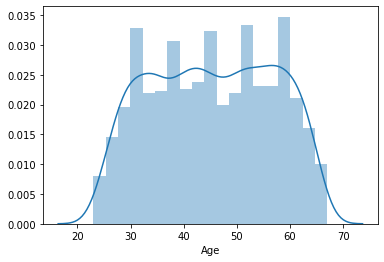

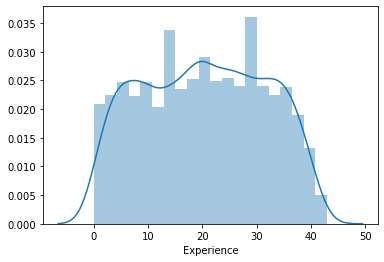

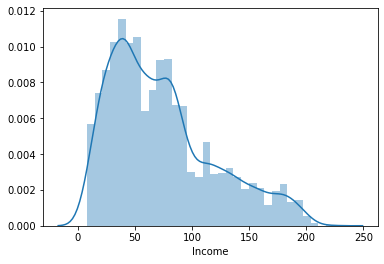

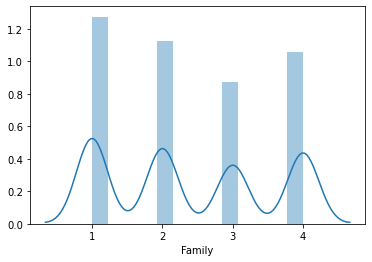

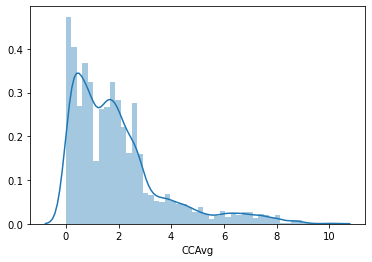

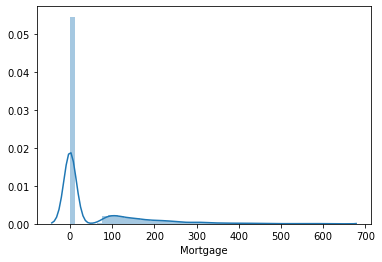

In [16]:
# distplot for continous columns
# print(bData.columns)
for i in ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']:
     sns.distplot(preBData[i])
     plt.show()

In [17]:
preBData['Mortgage'].value_counts(normalize=True)


0      0.6924
98     0.0034
103    0.0032
119    0.0032
83     0.0032
        ...  
541    0.0002
509    0.0002
505    0.0002
485    0.0002
577    0.0002
Name: Mortgage, Length: 347, dtype: float64

<u>**PreProcessingTag3**</u>

<b>Think to consider:</b> `Mortgage most of the values are , number of people without mortgage is 3462(i.e. 69%), and rest categories have a very small percentage. So it won't add much value to impute column values`

In [18]:
#The Loan_Amount_Term is highly skewed - so we will delete this column
preBData.drop(['Mortgage'], axis=1, inplace=True)
preBData.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1


## <a id = "link4"></a> Bivariate Analysis

In [19]:
preBData.groupby(["Personal Loan"]).mean()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,45.367257,20.378982,66.237389,93152.428761,2.373451,1.729009,1.843584,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,0.125000,0.291667,0.606250,0.297917


In [20]:
preBData.groupby(["Personal Loan"]).median()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,45.0,20.0,59.0,93437.0,2.0,1.4,2.0,0.0,0.0,1.0,0.0
1,45.0,20.0,142.5,93407.0,3.0,3.8,2.0,0.0,0.0,1.0,0.0


`**Observations**
Most columns are evenly disrtibuted for "Presonal Loan". `

In [21]:
preBData.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.977182,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977182,1.000000,-0.049046,-0.028492,-0.045528,-0.048718,0.018074,-0.014013,-0.000465,0.005526,0.013459,0.008834
Income,-0.055269,-0.049046,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028492,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.045528,-0.157501,0.011778,1.000000,-0.109275,0.064929,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.048718,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.018074,-0.187524,-0.017377,0.064929,-0.136124,1.000000,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Personal Loan,-0.007726,-0.014013,0.502462,0.000107,0.061367,0.366889,0.136722,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000465,-0.002616,0.004704,0.019994,0.015086,-0.010812,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.005526,0.169738,0.019972,0.014110,0.136534,0.013934,0.316355,0.317034,1.000000,0.175880,0.278644


`**Observations**
 "Presonal Loan" has most impact from "Income" , least from "ZIP Code".`

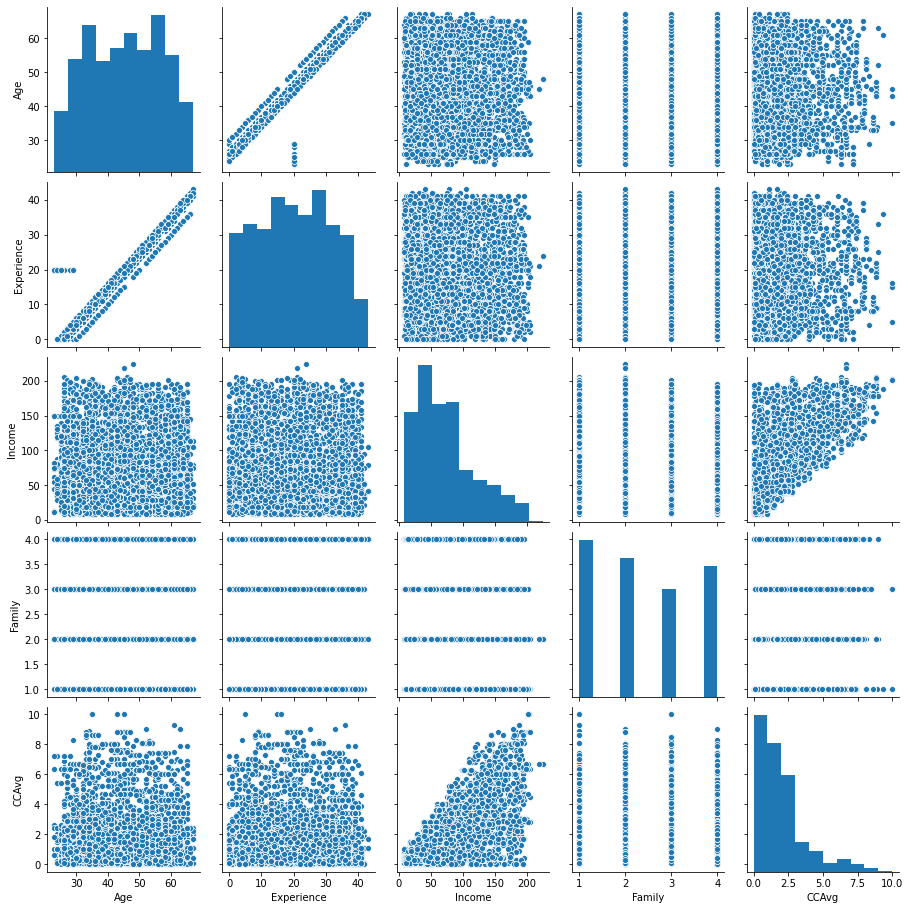

In [22]:
sns.pairplot(preBData[['Age', 'Experience', 'Income', 'Family', 'CCAvg']])

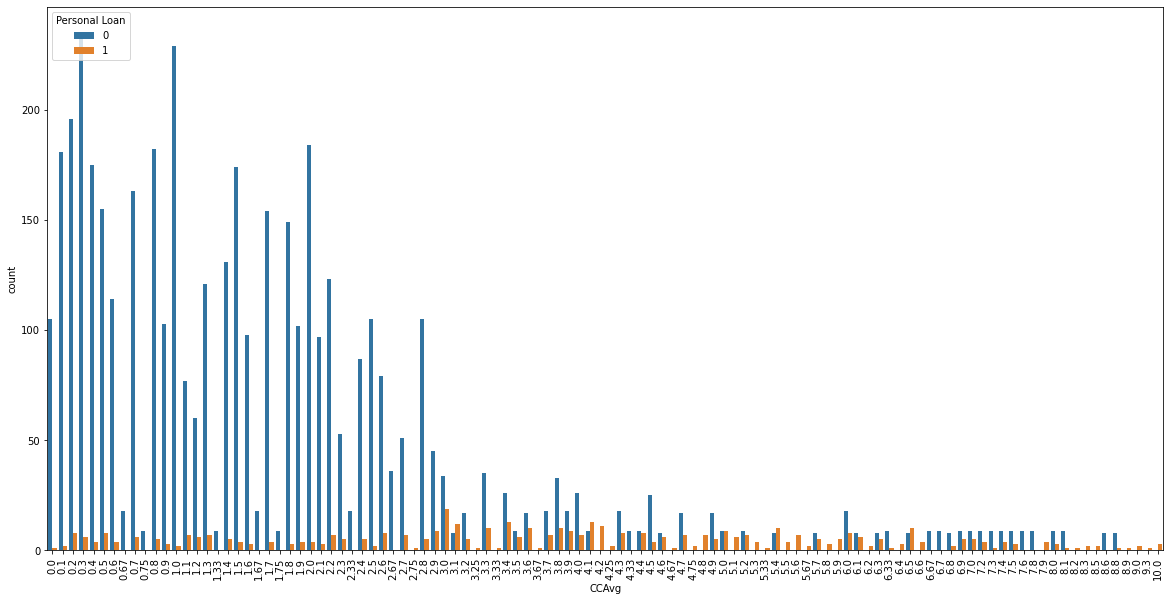

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'CCAvg',data=bData,hue='Personal Loan')
plt.xticks(rotation=90)
plt.show()

`**Observations**
 "Presonal Loan" taken by most customer across CCAvg`

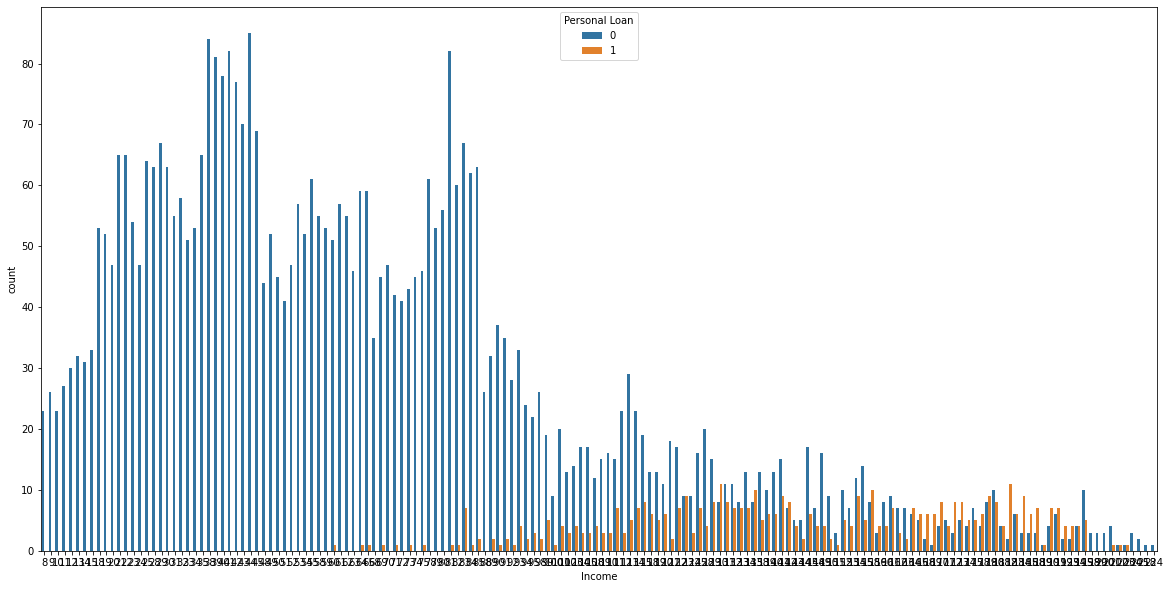

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Income',data=bData,hue='Personal Loan')

plt.show()

`**Observations**
 "Presonal Loan" taken by most customer with higher-middle income class, i.e convertion rate is high`

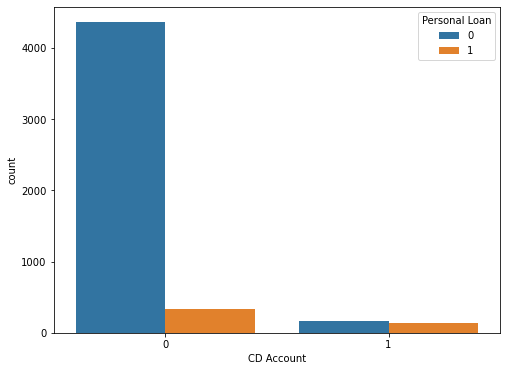

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'CD Account',data=bData,hue='Personal Loan')
#lt.xticks(rotation=90)
plt.show()

In [26]:
pd.crosstab(bData['Personal Loan'],bData['CD Account'],normalize='index')

CD Account,0,1
Personal Loan,,
0,0.964159,0.035841
1,0.708333,0.291667


**`Observations`**
 `"Presonal Loan" taken by most customer who have CD Account with bank. So targeting customer having CD account with bank has high liklyhood of conversion`

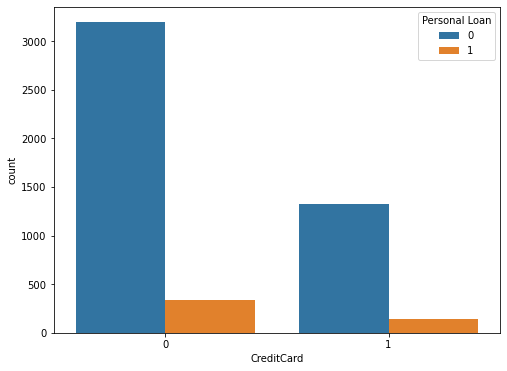

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'CreditCard',data=bData,hue='Personal Loan')
#lt.xticks(rotation=90)
plt.show()

In [28]:
pd.crosstab(bData['Personal Loan'],bData['CreditCard'],normalize='index')

CreditCard,0,1
Personal Loan,,
0,0.706416,0.293584
1,0.702083,0.297917


`**Observations**
 "Presonal Loan" has equal distribution with respect to CreditCard with bank. converstion rate cannot be concluded`

In [29]:
# Validating is ZIP code relevant information to carry forward for modelling?
preBData['ZIP Code'].value_counts(normalize=True)

94720    0.0338
94305    0.0254
95616    0.0232
90095    0.0142
93106    0.0114
          ...  
96145    0.0002
94970    0.0002
94598    0.0002
90068    0.0002
94087    0.0002
Name: ZIP Code, Length: 467, dtype: float64

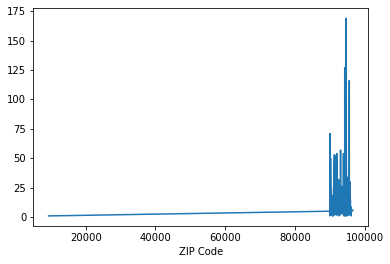

In [30]:
preBData['Personal Loan'].groupby([preBData["ZIP Code"]]).count().plot();

`**Observation:**
Disrtibution is even , though some zip code there are less data , that could be considered for removal. `

## <a id = "link6"></a> Get data model ready
<b><u>Data model is ready for further process</u></b><br>
`As part of Univariate and Bivariate analysis we have already done pre processing cover above in "PreProcessingTag#":`
- `Dropped two columns 
 -- ID(PreProcessingTag2): As ID was unique for all 5000 rows it will never add any value to regression
 -- Mortgage(PreProcessingTag3): Data was shewed and 80% data was two catagory this will have least impact on model`
- `Imputed Experience(PreProcessingTag1) with mean for negative values `


In [31]:
## Define X and Y variables
X = preBData.drop('Personal Loan', axis=1)
Y = preBData[['Personal Loan']]

In [32]:
X.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,1,0,0,0
1,45,19,34,90089,3,1.5,1,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,1


<u>**PreProcessingTag4**</u>

<b>Covert categorical variables to dummy variables</b>
Coulmns ['Experience','ZIP Code','Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard'] <br>

In [33]:
#Convert categorical variables to dummy variables
lstCatCol= ['Experience','ZIP Code','Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
X= pd.get_dummies(X, prefix=lstCatCol, columns=lstCatCol)

## Split the data into training and test set in the ratio of 70:30 respectively 

In [34]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

## Using Logistic Regression model to predict 

Whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance

In [35]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=7, solver="liblinear")
# fit the model on train data
logreg.fit(X_train, y_train)                    

LogisticRegression(random_state=7, solver='liblinear')

In [36]:
# Predicting the target variable on test data
y_predict = logreg.predict(X_test)             

In [37]:
# Observe the predicted and observed classes in a dataframe.

z = X_test.copy()
z['Observed Personal Loan'] = y_test
z['Predicted Personal Loan'] = y_predict
z.tail()

,Age,Income,Family,CCAvg,Experience_0,Experience_1,Experience_2,Experience_3,Experience_4,Experience_5,...,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1,Observed Personal Loan,Predicted Personal Loan
460,60,141,2,2.1,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
2492,28,134,2,3.1,0,0,0,1,0,0,...,1,0,1,0,0,1,1,0,0,0
3028,63,38,3,0.1,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
3437,57,39,4,0.7,0,0,0,0,0,0,...,0,1,1,0,0,1,1,0,0,0
4579,58,41,1,0.2,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,0,0


In [38]:
#Create function to plot ROC plot for given logistic regression (logreg) , dependent test data (y_data) 
# and independent data (x_data)
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def draw_roc(pLogreg,pX_data,pY_data):
    logit_roc_auc = roc_auc_score(pY_data, pLogreg.predict(pX_data))
    fpr, tpr, thresholds = roc_curve(pY_data, pLogreg.predict_proba(pX_data)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()


Trainig accuracy 0.9674285714285714

Testing accuracy 0.956

Recall: 0.6376811594202898

Precision: 0.8461538461538461

F1 Score: 0.7272727272727273

Roc Auc Score: 0.8129668645853285


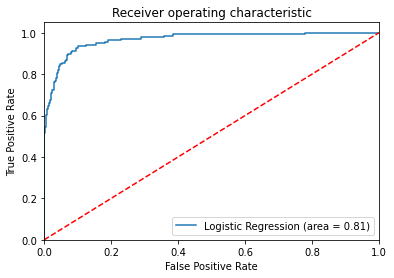

In [39]:

print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

draw_roc(logreg,X_test, y_test)

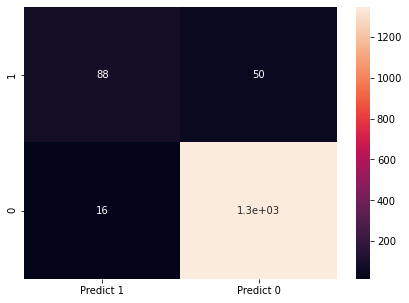

In [40]:
from sklearn import metrics

cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

## Check different parameters of Logistic Regression 

Reasoning whether the model performance is affected due to it or not?

Analysis plan: 
- Execute logistic regression for each solver ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga').
- Get F1 and ROC for each solver 
- Plot ROC for each solver



 ****** For solver :newton-cg ****** 

F1 Score: 0.7272727272727273

Roc Auc Score: 0.8129668645853285


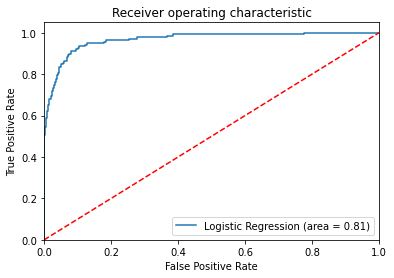



 ****** For solver :lbfgs ****** 

F1 Score: 0.7510204081632653

Roc Auc Score: 0.8278267254038179


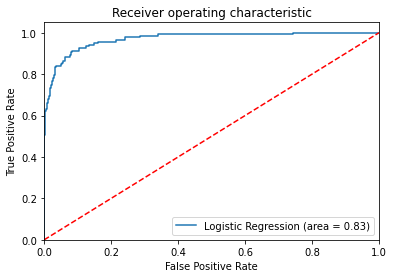



 ****** For solver :liblinear ****** 

F1 Score: 0.7272727272727273

Roc Auc Score: 0.8129668645853285


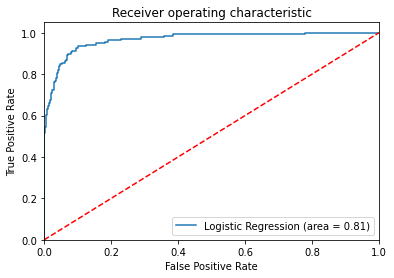



 ****** For solver :sag ****** 

F1 Score: 0.5514018691588785

Roc Auc Score: 0.7075272936219116


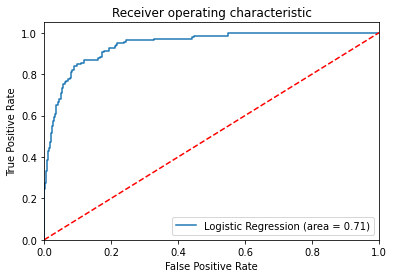



 ****** For solver :saga ****** 

F1 Score: 0.43478260869565216

Roc Auc Score: 0.6542329055736449


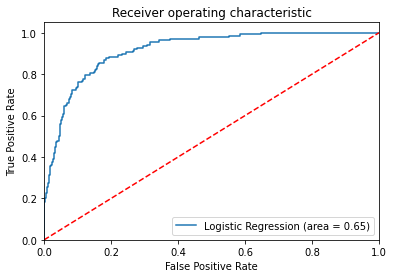

In [41]:
ls = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

analysisDf = pd.DataFrame(columns = ['Solver', 'ROC', 'F1Score'])
idx=0
for solv in ls:
    logreg = LogisticRegression(solver=solv)
    logreg.fit(X_train, y_train)
    y_predict = logreg.predict(X_test)
    roc= roc_auc_score(y_test,y_predict)
    f1= f1_score(y_test,y_predict)
    print('\n\n ****** For solver :' +solv+' ****** \n')
    print("F1 Score:",f1)
    print()
    print("Roc Auc Score:",roc)
    draw_roc(logreg,X_test, y_test)
    analysisDf.loc[idx] = [solv] + [roc]+[f1]
    idx=idx+1
    



In [42]:
analysisDf.head()

,Solver,ROC,F1Score
0,newton-cg,0.812967,0.727273
1,lbfgs,0.827827,0.751020
2,liblinear,0.812967,0.727273
3,sag,0.707527,0.551402
4,saga,0.654233,0.434783


In [43]:
# Running a loop to check different values of 'solver' , penalty as l2 and C as 0.75

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.965, 0.96, 0.965, 0.928, 0.913]

[0.957, 0.958, 0.956, 0.936, 0.922]


In [44]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,0.85,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 0.85, 1]

[0.851, 0.896, 0.906, 0.915, 0.923, 0.923, 0.927]

[0.845, 0.901, 0.91, 0.911, 0.919, 0.915, 0.917]


**Observation:**
- `Best testing accuracy is obtained for liblinear solver with C=0.75`

In [45]:
#Class weight difference 
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=0.75) # changing class weight to balanced
print('with class_weight="balanced"')
model.fit(X_train, y_train) 

y_predict = model.predict(X_test)   
print("Trainig accuracy",model.score(X_train,y_train))  
print("Testing accuracy",model.score(X_test, y_test))

print()
print()
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', C=0.75) # changing class weight to balanced
print('without class_weight="balanced"')
model.fit(X_train, y_train) 

y_predict = model.predict(X_test)   

print("Trainig accuracy",model.score(X_train,y_train))  
print("Testing accuracy",model.score(X_test, y_test))

print()
print()
model = LogisticRegression(random_state=42,penalty='l2', solver='lbfgs', C=0.75) # changing class weight to balanced
print('with solver lbfgs')
model.fit(X_train, y_train) 

y_predict = model.predict(X_test)   

print("Trainig accuracy",model.score(X_train,y_train))  
print("Testing accuracy",model.score(X_test, y_test))

with class_weight="balanced"
Trainig accuracy 0.9234285714285714
Testing accuracy 0.9186666666666666


without class_weight="balanced"
Trainig accuracy 0.9588571428571429
Testing accuracy 0.958


with solver lbfgs
Trainig accuracy 0.96
Testing accuracy 0.958


<b>Conclusion of analysis for different solver: </b>
- lbfgs solver has best ROC score, best fit for current model.
- newton-cg and libliner has identical ROC 
- When tried with varing random state for sag, saga and liblinear no variation observed.
- With combination of C, random_state, penalty score for liblinear come at par to lbfgs


**Conclusion:**  `It does make difference to select correct solver. Here for LogisticRegression default is liblinear solver. It always good to validate verify with different solvers.`

## Business understanding of the model



 ****************** print all stats for model evaluation ****************** 

   Trainig accuracy  Testing accuracy    Recall  Precision  F1 Score  \
5              0.96          0.959333  0.666667   0.859813   0.75102   

   Roc Auc Score  
5       0.827827  


******************  ROC plot ****************** 



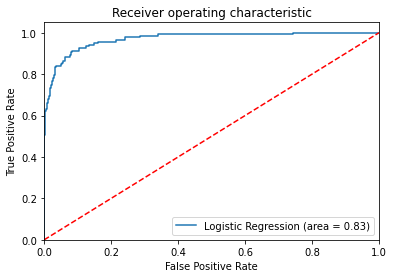



 ****************** Confusion Matrix ****************** 



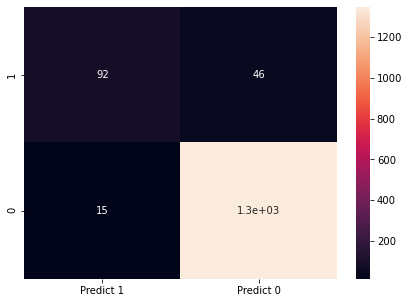

In [46]:
#Getting all data printed for final review and business case justification
logreg = LogisticRegression(solver="lbfgs")
# fit the model on train data
logreg.fit(X_train, y_train)    
# Predicting the target variable on test data
y_predict = logreg.predict(X_test)    
colList= ['Trainig accuracy', 'Testing accuracy', 'Recall','Precision','F1 Score','Roc Auc Score']
bestModelAnalysisDf = pd.DataFrame(columns = colList)
bestModelAnalysisDf.loc[idx] = [logreg.score(X_train,y_train)] + [logreg.score(X_test, y_test)] +[recall_score(y_test,y_predict)]+ [precision_score(y_test,y_predict)]+[f1_score(y_test,y_predict)]+ [roc_auc_score(y_test,y_predict)]    
print('\n\n ****************** print all stats for model evaluation ****************** \n')  

print(bestModelAnalysisDf)

print('\n\n******************  ROC plot ****************** \n')  
draw_roc(logreg,X_test, y_test)

print('\n\n ****************** Confusion Matrix ****************** \n')  
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

**Confusion Matrix conclusion**

*True Positive (observed=1,predicted=1):*

- `Predicted that campaign to a customer for personal loan and customer will apply for loan`

*False Positive (observed=0,predicted=1):*

- `Predicted that campaign to a customer for personal loan and customer NOT will apply for loan`

*True Negative (observed=0,predicted=0):*

- `Predicted NO campaign to a customer for personal loan and customer will NOT apply for loan`

*False Negative (observed=1,predicted=0):*

- `Predicted NO campaign to a customer for personal loan and customer will apply for loan`


Here the bank wants to give personal loan to the people who are convert campaign effort positive (high convertion rate) i.e. **less number of False Positive**, if FP is high bank would lose money in campaign. So that the bank doesn't lose money on the people who are not inclined after campaign for the personal loan. Hence **Precision is the important metric**.

In case of False negative bank will lose few customers but that okay because the bank would want to retain money for campaign more than customers who are not eligible for personal loan.

After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict which customer apply for personal loan when money is spent on campaign. They can use the model for upcoming campaign efforts to maximize the healthy conversion rate .

**Additional important details for Business that rely on stat details**
- `Prediction of customer applying loan for this model has max True positive and True negative compared to other two confusion matrix values.`
- `False Negative is least which it self is good indicator for best fit model.`
- `Ratios of confusion matrix, precision `<u>`0.859813`</u>` an Recall `<u>`0.666667`</u>` are good ration to bank on this model. That is, precision of accuracy predicting loan getting applied by customer is high.`
- `F1 Score is also good `<u>`0.75`</u>
- `Model built with high area under the curve : `<b><u>`0.827827`</b></u>`, plotted graph give very good idea of coverage and accuracy.`
- `"lbfgs" is best of all solver used for modelling with LogisticRegression.`
